In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Load data from Excel file
file_path = 'data analysis -.xlsx'  # Replace with the actual file path
#df = pd.read_excel(file_path)

# Read data from the second sheet (assuming sheet index is 1, indexing is 0-based)
df= pd.read_excel(file_path, sheet_name=1)

# Assume the last column is the target variable, and the rest are features
X = df.iloc[:, :-1]  # Extract all columns except the last one as features
y = df.iloc[:, -1]   # Extract the last column as the target variable

In [3]:
df

,Time,Center of Gravity (Hanavan) X,Center of Gravity (Hanavan) Y,Center of Gravity (Hanavan) Z,Center of Gravity (Hanavan) v(X),Center of Gravity (Hanavan) v(Y),Center of Gravity (Hanavan) v(Z),left shoulder - left hip - left knee X,left shoulder - left hip - left knee v(X),right shoulder - right hip - right knee X,right shoulder - right hip - right knee v(X),left hip - left knee - left ankle-bone X,left hip - left knee - left ankle-bone v(X),right hip - right knee - right ankle-bone X,right hip - right knee - right ankle-bone v(X),foot tip left - left ankle-bone - left knee X,foot tip left - left ankle-bone - left knee v(X),foot tip right - right ankle-bone - right knee X,foot tip right - right ankle-bone - right knee v(X),مسافه الوثب
0,0.733333,1.387672,0.433732,1.669939,3.696816,-0.067813,-0.397133,141.576828,-92.571335,164.812210,-88.807693,82.766388,347.633118,78.944016,-309.182465,102.118530,149.239120,118.414772,143.291977,5.5
1,0.666667,2.388158,0.398873,1.570671,3.892076,-0.163439,-0.256401,68.375977,47.035011,65.514565,-265.132019,132.240845,-110.410316,62.293274,251.873367,139.745087,-46.986633,130.116119,247.937897,5.2
2,0.783333,2.618493,0.406161,1.715415,3.265364,-0.139746,-0.547375,139.896088,-151.534943,149.130661,9.408539,64.552422,233.225525,95.044563,-366.960388,118.319229,-41.414837,145.684967,-221.971298,5.4
3,0.783333,2.520520,0.446503,1.380667,2.336002,0.201147,-0.548160,76.790169,300.401245,88.817123,-524.416931,94.553825,226.981812,147.357880,-93.617393,100.023918,-31.522507,87.257980,-4.943892,5.0
4,0.650000,2.167576,0.174523,1.505940,3.081867,-0.360927,-0.205945,149.483810,-179.033432,163.258240,-120.559105,50.473526,84.348488,55.389679,-193.022675,114.625710,-101.499046,87.819664,-44.754082,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.700000,1.806429,0.859489,1.581106,3.355036,-0.023798,-0.417988,164.007111,-195.456375,158.029602,261.553345,56.252056,219.928314,144.631058,-328.570831,145.982803,54.156643,148.978455,50.217129,5.2
76,0.683333,2.318791,0.697148,1.354514,3.340015,-0.117844,-0.185856,79.936317,-132.703171,97.754334,-231.810135,119.631630,-72.878265,49.377823,232.579529,92.870567,-7.907638,113.608757,36.843334,5.1
77,0.683333,1.983134,0.833465,1.522387,3.351388,-0.143548,-0.195873,149.214798,-138.924866,157.739044,-90.778648,57.912144,257.082581,102.200584,-231.355576,116.039848,-37.261272,114.597702,9.334258,5.2
78,0.683333,2.279295,0.674938,1.594910,3.615232,-0.884802,-0.634253,132.435349,-331.911865,163.247421,-232.446457,37.168861,188.599106,139.646515,-300.571320,130.018936,-2.858963,129.909531,82.399986,5.3


In [4]:
# Assuming df is your DataFrame with 19 parameters and 1 prediction
correlation_matrix = df.corr()

print(correlation_matrix)

                                                        Time  \
Time                                                1.000000   
Center of Gravity (Hanavan) X                       0.632586   
Center of Gravity (Hanavan) Y                      -0.008629   
Center of Gravity (Hanavan) Z                       0.421029   
Center of Gravity (Hanavan) v(X)                   -0.374313   
Center of Gravity (Hanavan) v(Y)                   -0.010492   
Center of Gravity (Hanavan) v(Z)                   -0.510331   
left shoulder - left hip - left knee X             -0.084444   
left shoulder - left hip - left knee v(X)           0.106281   
right shoulder - right hip - right knee X           0.015834   
right shoulder - right hip - right knee v(X)        0.226369   
left hip - left knee - left ankle-bone X            0.021472   
left hip - left knee - left ankle-bone v(X)         0.225388   
right hip - right knee - right ankle-bone X        -0.169583   
right hip - right knee - right ankle-bon

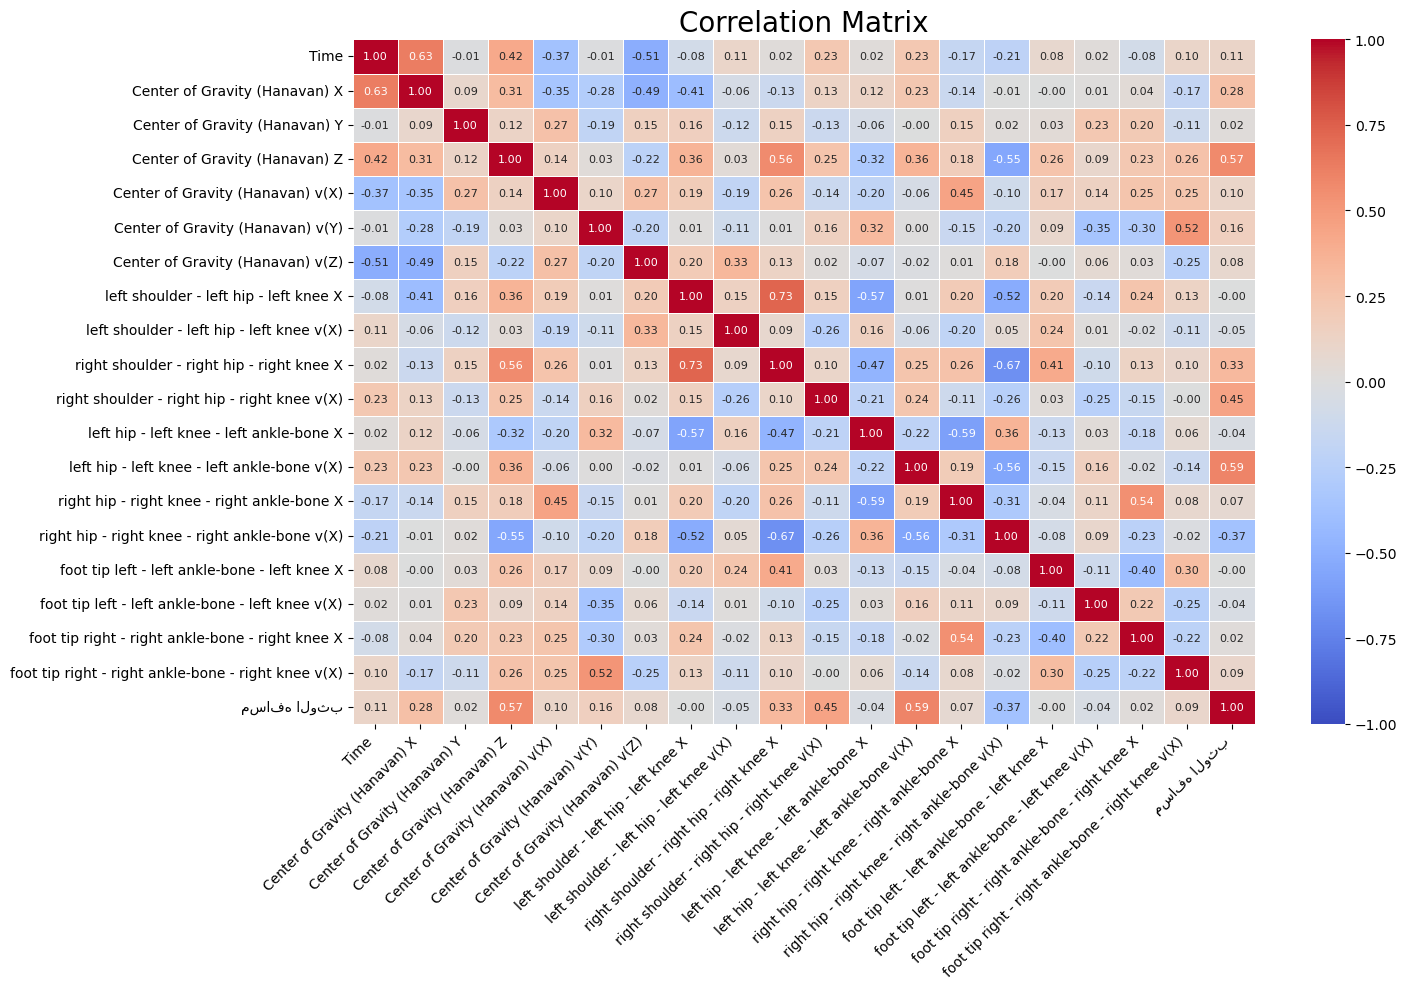

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=.5, annot_kws={"size": 8})

# Title and labels
plt.title('Correlation Matrix', size=20)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
X

,Time,Center of Gravity (Hanavan) X,Center of Gravity (Hanavan) Y,Center of Gravity (Hanavan) Z,Center of Gravity (Hanavan) v(X),Center of Gravity (Hanavan) v(Y),Center of Gravity (Hanavan) v(Z),left shoulder - left hip - left knee X,left shoulder - left hip - left knee v(X),right shoulder - right hip - right knee X,right shoulder - right hip - right knee v(X),left hip - left knee - left ankle-bone X,left hip - left knee - left ankle-bone v(X),right hip - right knee - right ankle-bone X,right hip - right knee - right ankle-bone v(X),foot tip left - left ankle-bone - left knee X,foot tip left - left ankle-bone - left knee v(X),foot tip right - right ankle-bone - right knee X,foot tip right - right ankle-bone - right knee v(X)
0,0.733333,1.387672,0.433732,1.669939,3.696816,-0.067813,-0.397133,141.576828,-92.571335,164.812210,-88.807693,82.766388,347.633118,78.944016,-309.182465,102.118530,149.239120,118.414772,143.291977
1,0.666667,2.388158,0.398873,1.570671,3.892076,-0.163439,-0.256401,68.375977,47.035011,65.514565,-265.132019,132.240845,-110.410316,62.293274,251.873367,139.745087,-46.986633,130.116119,247.937897
2,0.783333,2.618493,0.406161,1.715415,3.265364,-0.139746,-0.547375,139.896088,-151.534943,149.130661,9.408539,64.552422,233.225525,95.044563,-366.960388,118.319229,-41.414837,145.684967,-221.971298
3,0.783333,2.520520,0.446503,1.380667,2.336002,0.201147,-0.548160,76.790169,300.401245,88.817123,-524.416931,94.553825,226.981812,147.357880,-93.617393,100.023918,-31.522507,87.257980,-4.943892
4,0.650000,2.167576,0.174523,1.505940,3.081867,-0.360927,-0.205945,149.483810,-179.033432,163.258240,-120.559105,50.473526,84.348488,55.389679,-193.022675,114.625710,-101.499046,87.819664,-44.754082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.700000,1.806429,0.859489,1.581106,3.355036,-0.023798,-0.417988,164.007111,-195.456375,158.029602,261.553345,56.252056,219.928314,144.631058,-328.570831,145.982803,54.156643,148.978455,50.217129
76,0.683333,2.318791,0.697148,1.354514,3.340015,-0.117844,-0.185856,79.936317,-132.703171,97.754334,-231.810135,119.631630,-72.878265,49.377823,232.579529,92.870567,-7.907638,113.608757,36.843334
77,0.683333,1.983134,0.833465,1.522387,3.351388,-0.143548,-0.195873,149.214798,-138.924866,157.739044,-90.778648,57.912144,257.082581,102.200584,-231.355576,116.039848,-37.261272,114.597702,9.334258
78,0.683333,2.279295,0.674938,1.594910,3.615232,-0.884802,-0.634253,132.435349,-331.911865,163.247421,-232.446457,37.168861,188.599106,139.646515,-300.571320,130.018936,-2.858963,129.909531,82.399986


In [7]:
y

0     5.5
1     5.2
2     5.4
3     5.0
4     5.5
     ... 
75    5.2
76    5.1
77    5.2
78    5.3
79    5.8
Name: مسافه الوثب, Length: 80, dtype: float64

In [8]:
print(df.shape)
print(X.shape)
print(y.shape)

(80, 20)
(80, 19)
(80,)


In [9]:
# Assuming df is your DataFrame
column_names = X.columns
# Print the column names
print(column_names)

Index(['Time', 'Center of Gravity (Hanavan) X',
       'Center of Gravity (Hanavan) Y', 'Center of Gravity (Hanavan) Z',
       'Center of Gravity (Hanavan) v(X)', 'Center of Gravity (Hanavan) v(Y)',
       'Center of Gravity (Hanavan) v(Z)',
       'left shoulder - left hip - left knee X',
       'left shoulder - left hip - left knee v(X)',
       'right shoulder - right hip - right knee X',
       'right shoulder - right hip - right knee v(X)',
       'left hip - left knee - left ankle-bone X',
       'left hip - left knee - left ankle-bone v(X)',
       'right hip - right knee - right ankle-bone X',
       'right hip - right knee - right ankle-bone v(X)',
       'foot tip left - left ankle-bone - left knee X',
       'foot tip left - left ankle-bone - left knee v(X)',
       'foot tip right - right ankle-bone - right knee X',
       'foot tip right - right ankle-bone - right knee v(X)'],
      dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Capture the mean and std deviations for later use
means = scaler.mean_
std_devs = np.sqrt(scaler.var_)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=True)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 19)
(16, 19)
(64,)
(16,)


# Linear Regression Molde

In [13]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


# You can now use the trained model for making predictions on new data
# For example, if you have a new input data 'new_data':
# new_predictions = model.predict(new_data)

Mean Squared Error: 0.029927773065456645
Mean Absolute Error: 0.1273659539149411


In [14]:
# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Adjusted coefficients
adjusted_coefficients = coefficients / std_devs

# Adjusted intercept
adjusted_intercept = intercept - np.sum((coefficients * means) / std_devs)


lrcoff = pd.DataFrame()
lrcoff["X"]=("X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")
lrcoff["Features names"]=column_names
lrcoff["Cofficients"]=pd.Series(coefficients)
lrcoff["Adjusted_coefficients"]=pd.Series(adjusted_coefficients)

print(f'Intercept of LR is : {intercept}')
print(f'adjusted intercept of LR is : {adjusted_intercept}')
print(f'Coffecients LR are : ')
print(lrcoff)


# Print the equation
equation = f'y = {adjusted_intercept} + '
for i, coefficient in enumerate(adjusted_coefficients):
    equation += f'{coefficient} * X{i + 1} + '  # Assuming the features are labeled X1, X2, ...
equation = equation[:-2]  # Remove the trailing '+ '

print(f'Linear Regression Equation: {equation}')

Intercept of LR is : 5.25423692104495
adjusted intercept of LR is : 4.322448571361457
Coffecients LR are : 
      X                                     Features names  Cofficients  \
0    X1                                               Time    -0.101471   
1    X2                      Center of Gravity (Hanavan) X     0.056258   
2    X3                      Center of Gravity (Hanavan) Y     0.028260   
3    X4                      Center of Gravity (Hanavan) Z     0.097714   
4    X5                   Center of Gravity (Hanavan) v(X)     0.045210   
5    X6                   Center of Gravity (Hanavan) v(Y)     0.060334   
6    X7                   Center of Gravity (Hanavan) v(Z)    -0.015383   
7    X8             left shoulder - left hip - left knee X    -0.118123   
8    X9          left shoulder - left hip - left knee v(X)     0.079302   
9   X10          right shoulder - right hip - right knee X     0.143634   
10  X11       right shoulder - right hip - right knee v(X)     0.15

# Ridge Regression Model - L2

In [15]:
from sklearn.linear_model import Ridge

# Create the Ridge regression model
alpha = 1.0  # Regularization strength, you can adjust this parameter
model = Ridge(alpha=alpha)
# Fit the linear regression model

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


# You can now use the trained model for making predictions on new data
# For example, if you have a new input data 'new_data':
# new_predictions = model.predict(new_data)

Mean Squared Error: 0.02701211437033746
Mean Absolute Error: 0.12395980687401209


In [16]:
# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Adjusted coefficients
adjusted_coefficients = coefficients / std_devs

# Adjusted intercept
adjusted_intercept = intercept - np.sum((coefficients * means) / std_devs)


lrcoff = pd.DataFrame()
lrcoff["X"]=("X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")
lrcoff["Features names"]=column_names
lrcoff["Cofficients"]=pd.Series(coefficients)
lrcoff["Adjusted_coefficients"]=pd.Series(adjusted_coefficients)

print(f'Intercept of Ridge is : {intercept}')
print(f'adjusted intercept of Ridge is : {adjusted_intercept}')
print(f'Coffecients Ridge are : ')
print(lrcoff)


# Print the equation
equation = f'y = {adjusted_intercept} + '
for i, coefficient in enumerate(adjusted_coefficients):
    equation += f'{coefficient} * X{i + 1} + '  # Assuming the features are labeled X1, X2, ...
equation = equation[:-2]  # Remove the trailing '+ '

print(f'Ridge Equation: {equation}')

Intercept of Ridge is : 5.25488685779034
adjusted intercept of Ridge is : 4.141076526675198
Coffecients Ridge are : 
      X                                     Features names  Cofficients  \
0    X1                                               Time    -0.093239   
1    X2                      Center of Gravity (Hanavan) X     0.061527   
2    X3                      Center of Gravity (Hanavan) Y     0.020720   
3    X4                      Center of Gravity (Hanavan) Z     0.105314   
4    X5                   Center of Gravity (Hanavan) v(X)     0.039084   
5    X6                   Center of Gravity (Hanavan) v(Y)     0.053667   
6    X7                   Center of Gravity (Hanavan) v(Z)     0.000342   
7    X8             left shoulder - left hip - left knee X    -0.088954   
8    X9          left shoulder - left hip - left knee v(X)     0.060522   
9   X10          right shoulder - right hip - right knee X     0.114193   
10  X11       right shoulder - right hip - right knee v(X)

# Lasso Regression model - L1

In [17]:
from sklearn.linear_model import Lasso

# Create the Lasso regression model
alpha = 0.01  # Regularization strength, you can adjust this parameter
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


# You can now use the trained model for making predictions on new data
# For example, if you have a new input data 'new_data':
# new_predictions = model.predict(new_data)

Mean Squared Error: 0.03637103538007449
Mean Absolute Error: 0.1578840161946043


In [18]:
# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Adjusted coefficients
adjusted_coefficients = coefficients / std_devs

# Adjusted intercept
adjusted_intercept = intercept - np.sum((coefficients * means) / std_devs)


lrcoff = pd.DataFrame()
lrcoff["X"]=("X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19")
lrcoff["Features names"]=column_names
lrcoff["Cofficients"]=pd.Series(coefficients)
lrcoff["Adjusted_coefficients"]=pd.Series(adjusted_coefficients)

print(f'Intercept of Lasso is : {intercept}')
print(f'adjusted intercept of Lasso is : {adjusted_intercept}')
print(f'Coffecients Lasso are : ')
print(lrcoff)


# Print the equation
equation = f'y = {adjusted_intercept} + '
for i, coefficient in enumerate(adjusted_coefficients):
    equation += f'{coefficient} * X{i + 1} + '  # Assuming the features are labeled X1, X2, ...
equation = equation[:-2]  # Remove the trailing '+ '

print(f'Lasso Equation: {equation}')

Intercept of Lasso is : 5.258521375359294
adjusted intercept of Lasso is : 3.967521116414189
Coffecients Lasso are : 
      X                                     Features names  Cofficients  \
0    X1                                               Time    -0.058619   
1    X2                      Center of Gravity (Hanavan) X     0.041687   
2    X3                      Center of Gravity (Hanavan) Y     0.000000   
3    X4                      Center of Gravity (Hanavan) Z     0.109568   
4    X5                   Center of Gravity (Hanavan) v(X)     0.023698   
5    X6                   Center of Gravity (Hanavan) v(Y)     0.020573   
6    X7                   Center of Gravity (Hanavan) v(Z)     0.025951   
7    X8             left shoulder - left hip - left knee X    -0.016304   
8    X9          left shoulder - left hip - left knee v(X)     0.000000   
9   X10          right shoulder - right hip - right knee X     0.007192   
10  X11       right shoulder - right hip - right knee v(X

# Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor


# Create the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed

model.fit(X_train, y_train)



# Fit the model on the entire dataset
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.022986250000000017
Mean Absolute Error: 0.12062500000000032


In [20]:
# If you want to extract feature importances:
feature_importances = model.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f'Feature X{i + 1}: {importance:.12f}')

Feature Importances:
Feature X1: 0.015823084611
Feature X2: 0.025600322469
Feature X3: 0.029310958927
Feature X4: 0.387757926945
Feature X5: 0.012935007395
Feature X6: 0.014831648298
Feature X7: 0.023142705120
Feature X8: 0.021809696211
Feature X9: 0.030299279578
Feature X10: 0.009338650933
Feature X11: 0.079199488987
Feature X12: 0.016694107406
Feature X13: 0.206920634350
Feature X14: 0.058653013277
Feature X15: 0.018701090793
Feature X16: 0.005360230818
Feature X17: 0.019706039785
Feature X18: 0.010551538504
Feature X19: 0.013364575591
